In [12]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import yaml
import glob
import json
from scipy import stats
from mayavi import mlab
from check import ROI
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import seaborn

resolution = 0.4
cubes_per_axis = int((ROI)/resolution)

f=open(r'/home/akhildb/lidar_optimisation/config.yml')
config=yaml.load(f,Loader=yaml.FullLoader)
cube_resolution = config['cube_resolution']
total_cubes = (ROI*ROI)/np.prod(cube_resolution)
frames = len(glob.glob("convert_image/0/Labels/*"))

bb_classes = codecs.open('./bb_classes.txt', 'r', encoding='utf-8').read()
A = json.loads(bb_classes)

bikes = []
cars = []
for x in A:
    if(x[0]=='b'):
        bikes.append(x[1])
    else:
        cars.append(x[1])

In [13]:
x = np.linspace(-ROI/2,ROI/2,cubes_per_axis)
y = np.linspace(-ROI/2,ROI/2,cubes_per_axis)

Xc = []
Yc = []
Xb = []
Yb = []
for i in range(len(cars)):
    for j in range(8):
        Xc.append(cars[i][j][0])
        Yc.append(cars[i][j][1])
        if(i<len(bikes)):
            Xb.append(bikes[i][j][0])
            Yb.append(bikes[i][j][1])

In [14]:
q_x = np.digitize(Xc,x)
q_y = np.digitize(Yc,y)

Mc = np.zeros((cubes_per_axis,cubes_per_axis))
for i in range(len(q_x)):
    a = q_x[i]
    b = q_y[i]
    Mc[a,b] = Mc[a,b] + 1
    
Mc = Mc/frames
plt.figure(dpi=100)
axc = seaborn.heatmap(Mc,vmin=0,vmax=1,cmap="YlGnBu",xticklabels=25, yticklabels=0)
plt.title('Cars : Heatmap of ROI')
plt.show()

IndexError: index 125 is out of bounds for axis 0 with size 125

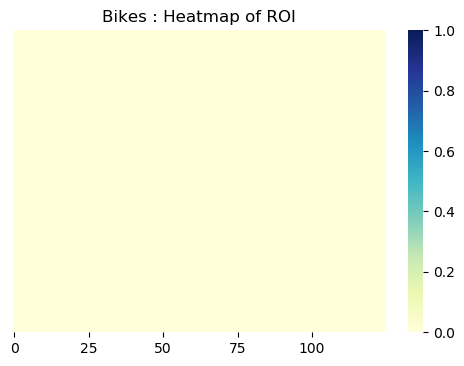

In [10]:
q_x = np.digitize(Xb,x)
q_y = np.digitize(Yb,y)

Mb = np.zeros((cubes_per_axis,cubes_per_axis))
for i in range(len(q_x)):
    a = q_x[i]
    b = q_y[i]
    Mb[a,b] = Mb[a,b] + 1
    
Mb = Mb/frames
plt.figure(dpi=100)
axb = seaborn.heatmap(Mb,vmin=0,vmax=1,cmap="YlGnBu",xticklabels=25, yticklabels=0)
plt.title('Bikes : Heatmap of ROI')
plt.show()

In [19]:
Xc

[39.35067666397913,
 43.989057875772716,
 43.97784980925462,
 39.339468597461035,
 39.32259848868287,
 43.96097970047646,
 43.94977163395836,
 39.31139042216478,
 -62.25837747220127,
 -62.27885335885395,
 -60.01955371521809,
 -59.999077828565405,
 -62.25920832143159,
 -62.279684208084284,
 -60.02038456444842,
 -59.99990867779573,
 -47.62180808627678,
 -47.60132994440534,
 -49.86062958081842,
 -49.88110772268986,
 -47.62264249056783,
 -47.60216434869639,
 -49.86146398510947,
 -49.8819421269809,
 -5.157677281542952,
 -0.5186473701754934,
 -0.5298665051489664,
 -5.168896416516432,
 -5.1585087119896755,
 -0.5194788006222169,
 -0.5306979355956898,
 -5.169727846963156,
 244.79512438182525,
 244.8219054901037,
 247.08118949068285,
 247.0544083824044,
 244.7959588119865,
 244.82273992026495,
 247.0820239208441,
 247.05524281256567,
 -48.01100317104717,
 -47.990520088466894,
 -50.24981971485258,
 -50.27030279743285,
 -48.01183668502637,
 -47.9913536024461,
 -50.25065322883177,
 -50.271136311412

In [20]:
Xb

[-30.343992312838818,
 -32.04141857375403,
 -31.51147916366601,
 -29.81405290275079,
 -30.33847312070539,
 -32.03589938162061,
 -31.50595997153258,
 -29.808533710617365,
 43.12992522621627,
 40.7804062087592,
 40.762395477139094,
 43.111914494596164,
 43.13356374704742,
 40.78404472959035,
 40.76603399797024,
 43.11555301542731,
 -39.74182053245712,
 -37.3917936466685,
 -37.39999150427292,
 -39.75001839006154,
 -39.7469124601116,
 -37.39688557432298,
 -37.4050834319274,
 -39.75511031771602,
 30.557366651070986,
 29.051088921713546,
 29.63925152483719,
 31.14552925419462,
 30.56088965078321,
 29.054611921425778,
 29.642774524549417,
 31.14905225390686,
 187.1879244571051,
 187.18183462003486,
 186.41560426286082,
 186.42169409993102,
 187.18866243416846,
 187.18257259709827,
 186.41634223992418,
 186.42243207699443,
 176.52799763146345,
 178.87814310430423,
 178.87476153212054,
 176.52461605927977,
 176.52435953405995,
 178.87450500690073,
 178.87112343471705,
 176.52097796187627,
 -28.